<a href="https://colab.research.google.com/github/kv1441/InflationProject/blob/main/InflationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import norm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_white
df = pd.read_csv("/content/drive/MyDrive/Курсач/inflationrate.csv") #читаем файл
df.head()

,country,year,indexprice,inflationrate,oilprices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,Continent,salaryraise,consumerconfidenceindex
0,United States of America,1980,168.61,0.14,21.59,1.0,0.09,12575.0,0.07,328.08482,North America,0.10,0.160000
1,United States of America,1981,203.15,0.10,31.77,1.0,0.12,13976.0,0.08,328.08482,North America,0.14,0.080845
2,United States of America,1982,188.98,0.06,28.52,1.0,0.04,14434.0,0.10,328.08482,North America,0.02,0.080000
3,United States of America,1983,285.43,0.03,26.19,1.0,0.09,15544.0,0.10,328.08482,North America,-0.01,0.010000
4,United States of America,1984,248.89,0.04,25.88,1.0,0.11,17121.0,0.08,328.08482,North America,0.08,0.020000


In [ ]:
# Проверка пропусков для всех столбцов
for col in df.columns:
    print(f"Столбец '{col}': {df[col].isnull().sum()} пропущенных значений")

Столбец 'country': 0 пропущенных значений
Столбец 'year': 0 пропущенных значений
Столбец 'indexprice': 0 пропущенных значений
Столбец 'inflationrate': 0 пропущенных значений
Столбец 'oilprices': 0 пропущенных значений
Столбец 'exchange_rate': 0 пропущенных значений
Столбец 'gdppercent': 0 пропущенных значений
Столбец 'percapitaincome': 0 пропущенных значений
Столбец 'unemploymentrate': 0 пропущенных значений
Столбец 'manufacturingoutput': 0 пропущенных значений
Столбец 'Continent': 0 пропущенных значений
Столбец 'salaryraise': 0 пропущенных значений
Столбец 'consumerconfidenceindex': 0 пропущенных значений


In [ ]:
columns = ['indexprice', 'inflationrate', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex']
for col in columns:
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
column_info = df['inflationrate'].describe()
print(column_info)

count    369.000000
mean       0.041748
std        0.037195
min       -0.040000
25%        0.020000
50%        0.030000
75%        0.050000
max        0.240000
Name: inflationrate, dtype: float64


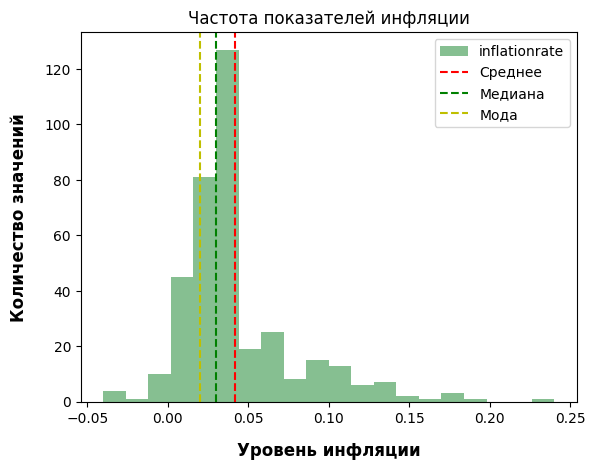

In [ ]:
#Гистограмма целевой переменной
hist = df.plot.hist(y = "inflationrate", bins = 20, grid=False, color='#86bf91')
hist.set_title("Частота показателей инфляции") # название гистограммы
hist.set_xlabel("Уровень инфляции", labelpad=12, weight='bold', size=12) # Название оси Х
hist.set_ylabel("Количество значений", labelpad=12, weight='bold', size=12) # Название оси Y

# Добавление средних значений
mean_inflation = df["inflationrate"].mean()
median_inflation = df["inflationrate"].median()
mode_inflation = df["inflationrate"].mode()[0]

plt.axvline(x=mean_inflation, color='r', linestyle='--', label='Среднее')
plt.axvline(x=median_inflation, color='g', linestyle='--', label='Медиана')
plt.axvline(x=mode_inflation, color='y', linestyle='--', label='Мода')

plt.legend()
plt.show()

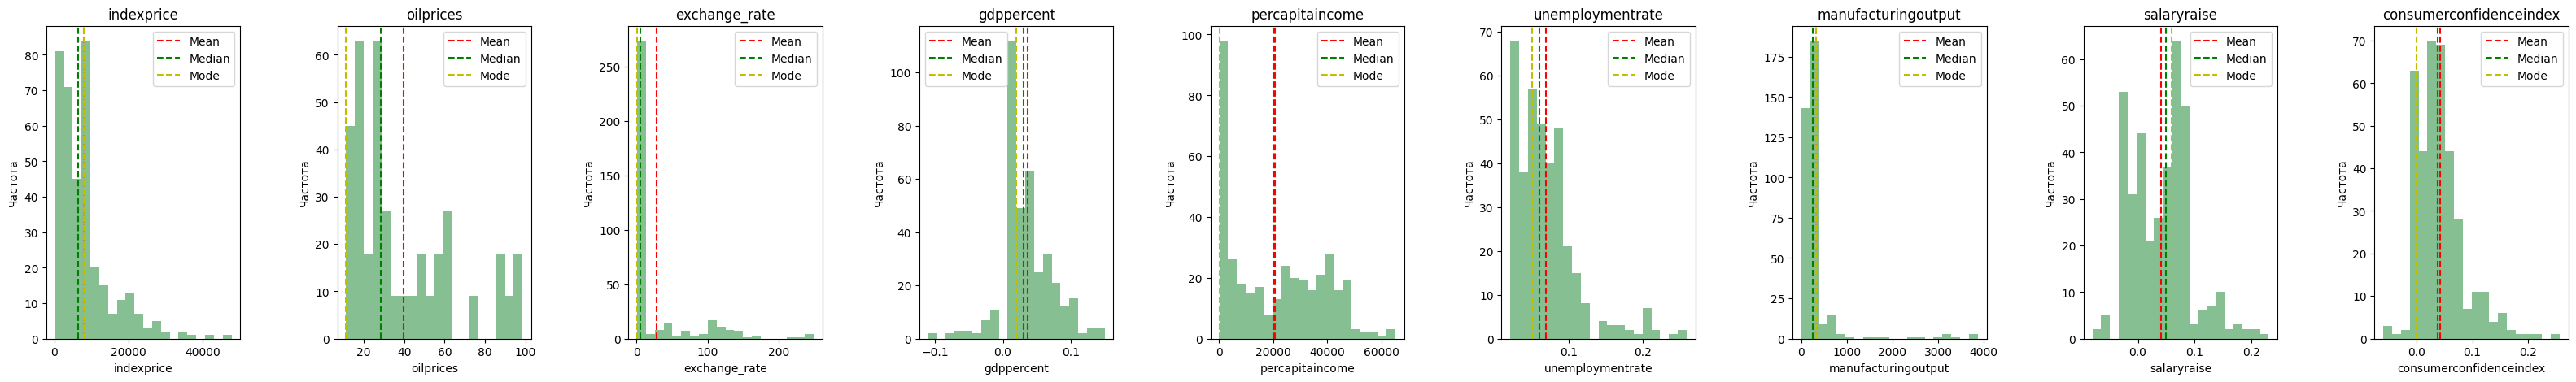

In [ ]:
#Гистограммы количественных переменных
columns = ['indexprice', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex']

fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(40, 5))

for i, col in enumerate(columns):

    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_value = df[col].mode()[0]

    axes[i].hist(df[col], bins=20, color='#86bf91')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

    # Добавление средних значений
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]

    axes[i].axvline(x=mean_value, color='r', linestyle='--', label='Mean')
    axes[i].axvline(x=median_value, color='g', linestyle='--', label='Median')
    axes[i].axvline(x=mode_value, color='y', linestyle='--', label='Mode')
    axes[i].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()

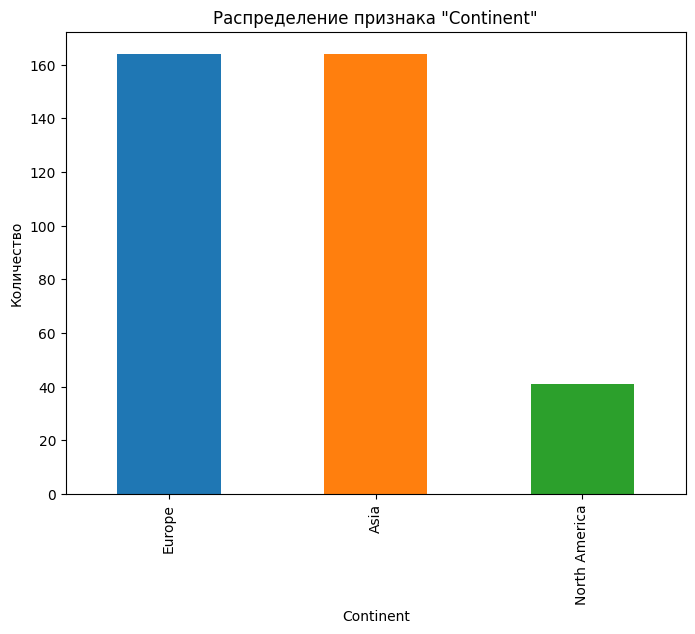

In [ ]:
#Гистограмма категориальной переменной
categorical_feature = 'Continent'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(8, 6))
df[categorical_feature].value_counts().plot(kind='bar', color=colors)
plt.title(f'Распределение признака "{categorical_feature}"')
plt.xlabel(categorical_feature)
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Уровень инфляции')

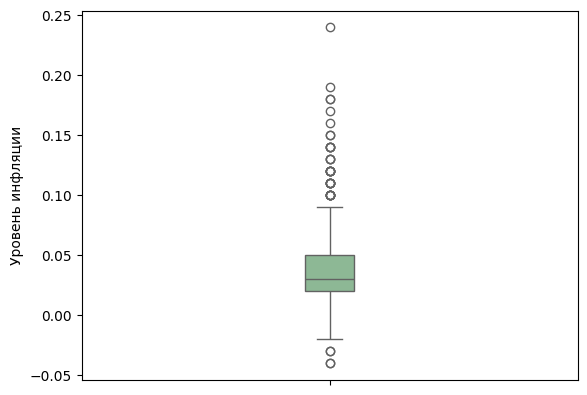

In [ ]:
#Ящик с усами целевого признака
ax = sns.boxplot(y = "inflationrate", data = df, color='#86bf91', width = .1)
ax.set_ylabel("Уровень инфляции")

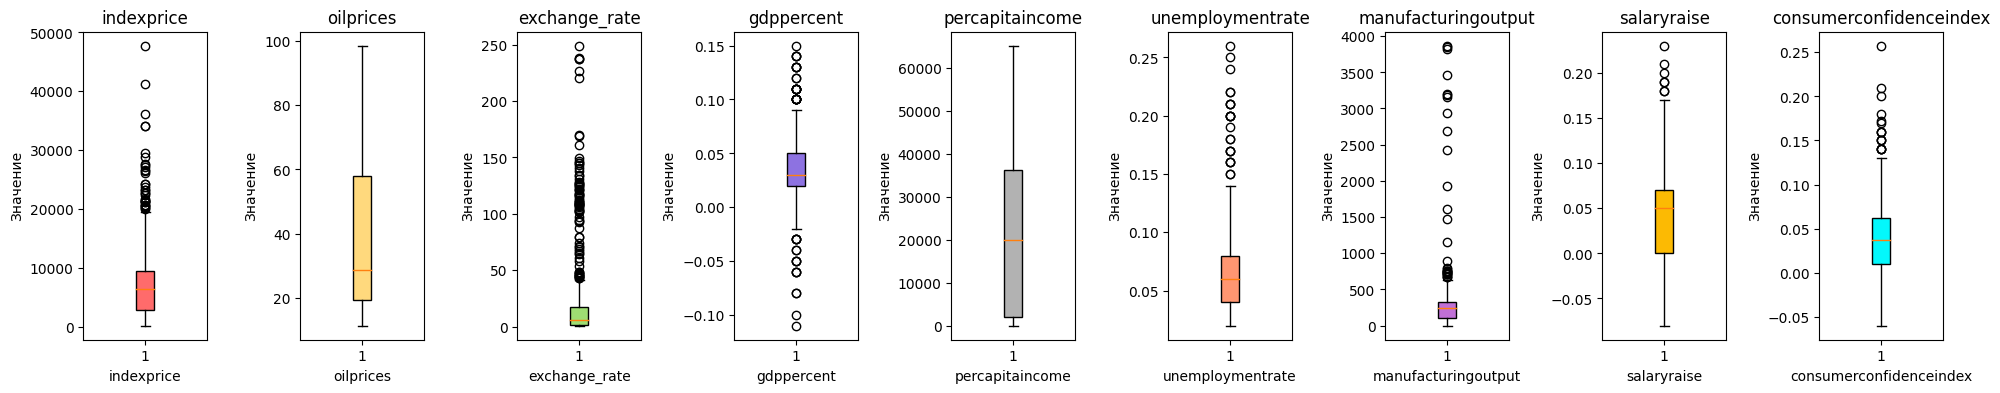

In [ ]:
#Гистограммы количественных переменных
columns = ['indexprice', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex']

# Создание фигуры с подграфиками
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(24, 4))
colors = ['#FF6B6B', '#FFD97D', '#9EDE73', '#8D72E1', '#B2B2B2', '#FF9671', '#C070D6', '#FCBA03', '#03F8FC']

# Построение ящиков с усами для каждой количественной колонки
for i, col in enumerate(columns):
    axes[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor=colors[i%len(colors)]))
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Значение')

# Регулировка расстояния между подграфиками
plt.subplots_adjust(wspace=0.75)

# Отображение графика
plt.show()

In [ ]:
columns = ['indexprice', 'inflationrate', 'oilprices', 'exchange_rate',
           'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex']


#Обработка выбросов
for col in columns:
    mean = df[col].mean()  # Среднее значение
    std = df[col].std()  # Стандартное отклонение
    lower_bound = mean - 3 * std  # Нижняя граница выбросов
    upper_bound = mean + 3 * std  # Верхняя граница выбросов

    #Обоаботанный от выбросов датасет
    df.loc[(df[col] > upper_bound) | (df[col] < lower_bound), col] = df[col].mean()

df

,country,year,indexprice,inflationrate,oilprices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,Continent,salaryraise,consumerconfidenceindex
0,United States of America,1980,168.61,0.140000,21.59,1.00,0.090000,12575.0,0.070000,328.08482,North America,0.100000,0.160000
1,United States of America,1981,203.15,0.100000,31.77,1.00,0.120000,13976.0,0.080000,328.08482,North America,0.140000,0.080845
2,United States of America,1982,188.98,0.060000,28.52,1.00,0.040000,14434.0,0.100000,328.08482,North America,0.020000,0.080000
3,United States of America,1983,285.43,0.030000,26.19,1.00,0.090000,15544.0,0.100000,328.08482,North America,-0.010000,0.010000
4,United States of America,1984,248.89,0.040000,25.88,1.00,0.110000,17121.0,0.080000,328.08482,North America,0.080000,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,Spain,2016,9352.10,0.041748,51.97,1.11,0.030000,26523.0,0.068908,139.01000,Europe,0.036805,0.061748
365,Spain,2017,10043.90,0.020000,57.88,1.13,0.030000,28170.0,0.170000,148.80000,Europe,0.060000,0.000000
366,Spain,2018,8539.90,0.020000,49.52,1.18,0.020000,30389.0,0.150000,158.33000,Europe,0.057220,0.040000
367,Spain,2019,9549.20,0.010000,59.88,1.12,0.020000,29565.0,0.140000,155.49000,Europe,-0.030000,-0.010000


In [ ]:
from scipy.stats import skew, kurtosis
# Вычисляем показатель асимметрии
data_skewness = skew(df['inflationrate'])

# Вычисляем коэффициент эксцесса
data_kurtosis = kurtosis(df['inflationrate'])

print('Показатель асимметрии:', data_skewness)
print('Коэффициент эксцесса:', data_kurtosis)

Показатель асимметрии: 1.1484228734452238
Коэффициент эксцесса: 1.623656489731454


In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Continent'])
print(df)

                      country  year  indexprice  inflationrate  oilprices  \
0    United States of America  1980      168.61       0.140000      21.59   
1    United States of America  1981      203.15       0.100000      31.77   
2    United States of America  1982      188.98       0.060000      28.52   
3    United States of America  1983      285.43       0.030000      26.19   
4    United States of America  1984      248.89       0.040000      25.88   
..                        ...   ...         ...            ...        ...   
364                     Spain  2016     9352.10       0.041748      51.97   
365                     Spain  2017    10043.90       0.020000      57.88   
366                     Spain  2018     8539.90       0.020000      49.52   
367                     Spain  2019     9549.20       0.010000      59.88   
368                     Spain  2020     8073.70       0.041748      47.02   

     exchange_rate  gdppercent  percapitaincome  unemploymentrate  \
0     

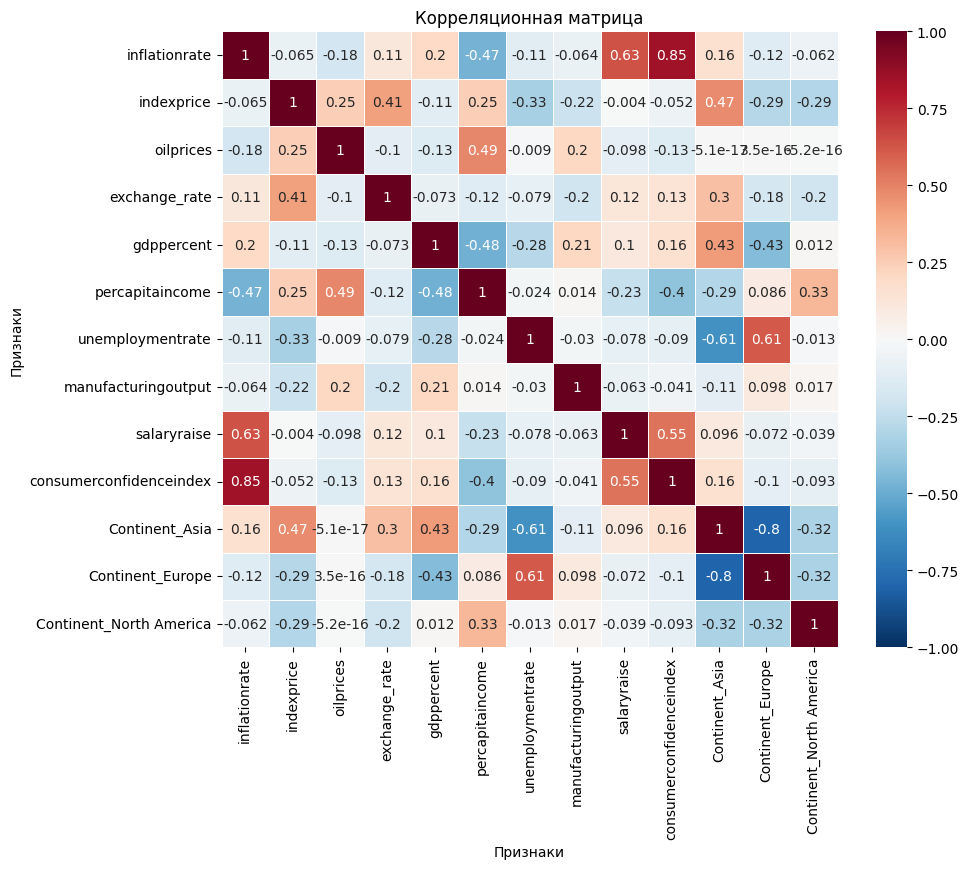

In [ ]:
selected_columns = ['inflationrate', 'indexprice', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex', 'Continent_Asia',  'Continent_Europe',  'Continent_North America']
corr_matrix = df[selected_columns].corr()

# Создаем фигуру и оси для корреляционной матрицы
fig, ax = plt.subplots(figsize=(10, 8))

# Отображаем корреляционную матрицу с цветным отображением
sns.heatmap(corr_matrix,
            annot=True,           # Отображаем значения корреляции
            cmap='RdBu_r',        # Цветовая палитра от красного до синего
            vmin=-1, vmax=1,       # Ограничиваем диапазон значений от -1 до 1
            center=0,             # Центр цветовой палитры на 0
            square=True,          # Делаем ячейки квадратными
            linewidths=0.5,       # Ширина границ ячеек
            ax=ax)                # Используем заданные оси

# Устанавливаем заголовок и метки осей
ax.set_title('Корреляционная матрица')
ax.set_xlabel('Признаки')
ax.set_ylabel('Признаки')

# Отображаем график
plt.show()

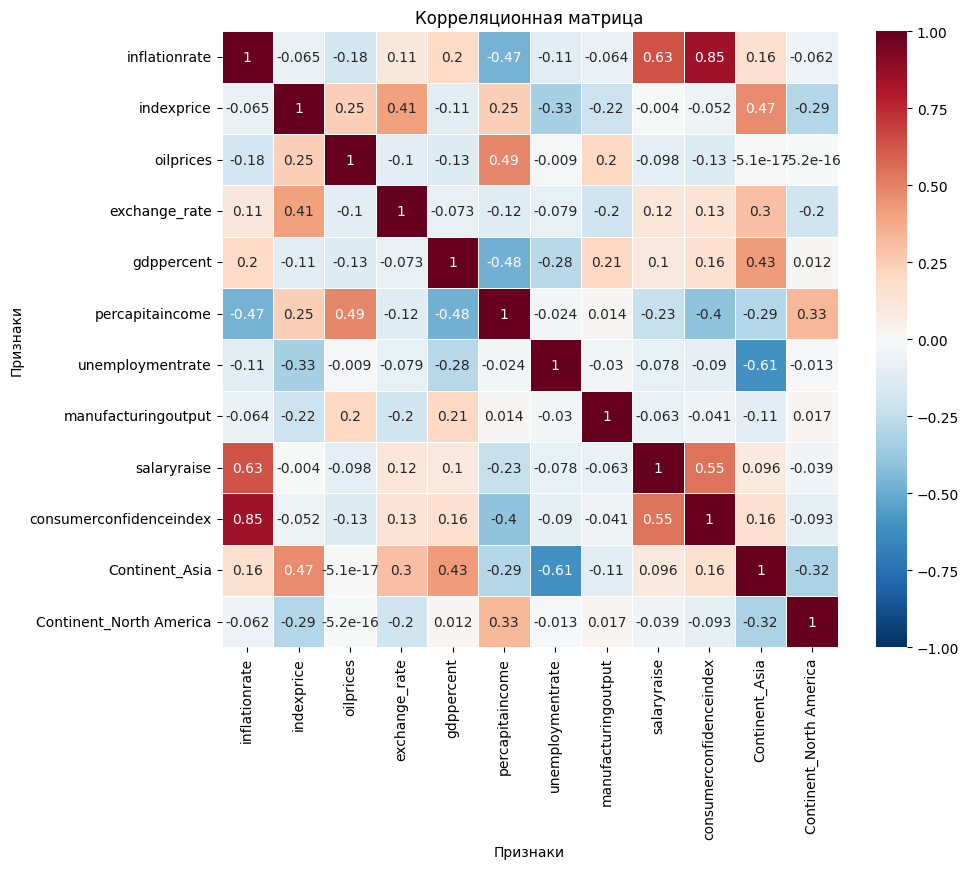

In [ ]:
selected_columns = ['inflationrate', 'indexprice', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex', 'Continent_Asia',  'Continent_North America']
corr_matrix = df[selected_columns].corr()

# Создаем фигуру и оси для корреляционной матрицы
fig, ax = plt.subplots(figsize=(10, 8))

# Отображаем корреляционную матрицу с цветным отображением
sns.heatmap(corr_matrix,
            annot=True,           # Отображаем значения корреляции
            cmap='RdBu_r',        # Цветовая палитра от красного до синего
            vmin=-1, vmax=1,       # Ограничиваем диапазон значений от -1 до 1
            center=0,             # Центр цветовой палитры на 0
            square=True,          # Делаем ячейки квадратными
            linewidths=0.5,       # Ширина границ ячеек
            ax=ax)                # Используем заданные оси

# Устанавливаем заголовок и метки осей
ax.set_title('Корреляционная матрица')
ax.set_xlabel('Признаки')
ax.set_ylabel('Признаки')

# Отображаем график
plt.show()

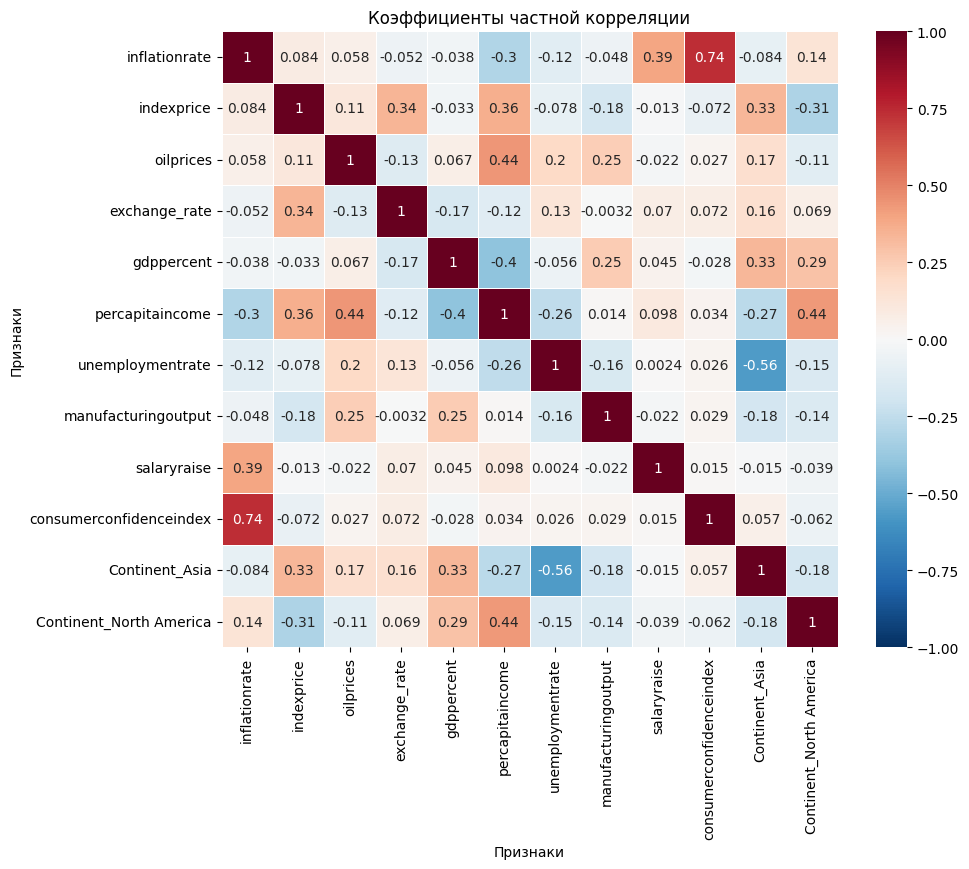

In [ ]:
import pingouin as pg

selected_columns = ['inflationrate', 'indexprice', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex', 'Continent_Asia',  'Continent_North America']
corr_matrix = df[selected_columns].pcorr()

# Создаем фигуру и оси для корреляционной матрицы
fig, ax = plt.subplots(figsize=(10, 8))

# Отображаем корреляционную матрицу с цветным отображением
sns.heatmap(corr_matrix,
            annot=True,           # Отображаем значения корреляции
            cmap='RdBu_r',        # Цветовая палитра от красного до синего
            vmin=-1, vmax=1,       # Ограничиваем диапазон значений от -1 до 1
            center=0,             # Центр цветовой палитры на 0
            square=True,          # Делаем ячейки квадратными
            linewidths=0.5,       # Ширина границ ячеек
            ax=ax)                # Используем заданные оси

# Устанавливаем заголовок и метки осей
ax.set_title('Коэффициенты частной корреляции')
ax.set_xlabel('Признаки')
ax.set_ylabel('Признаки')

# Отображаем график
plt.show()

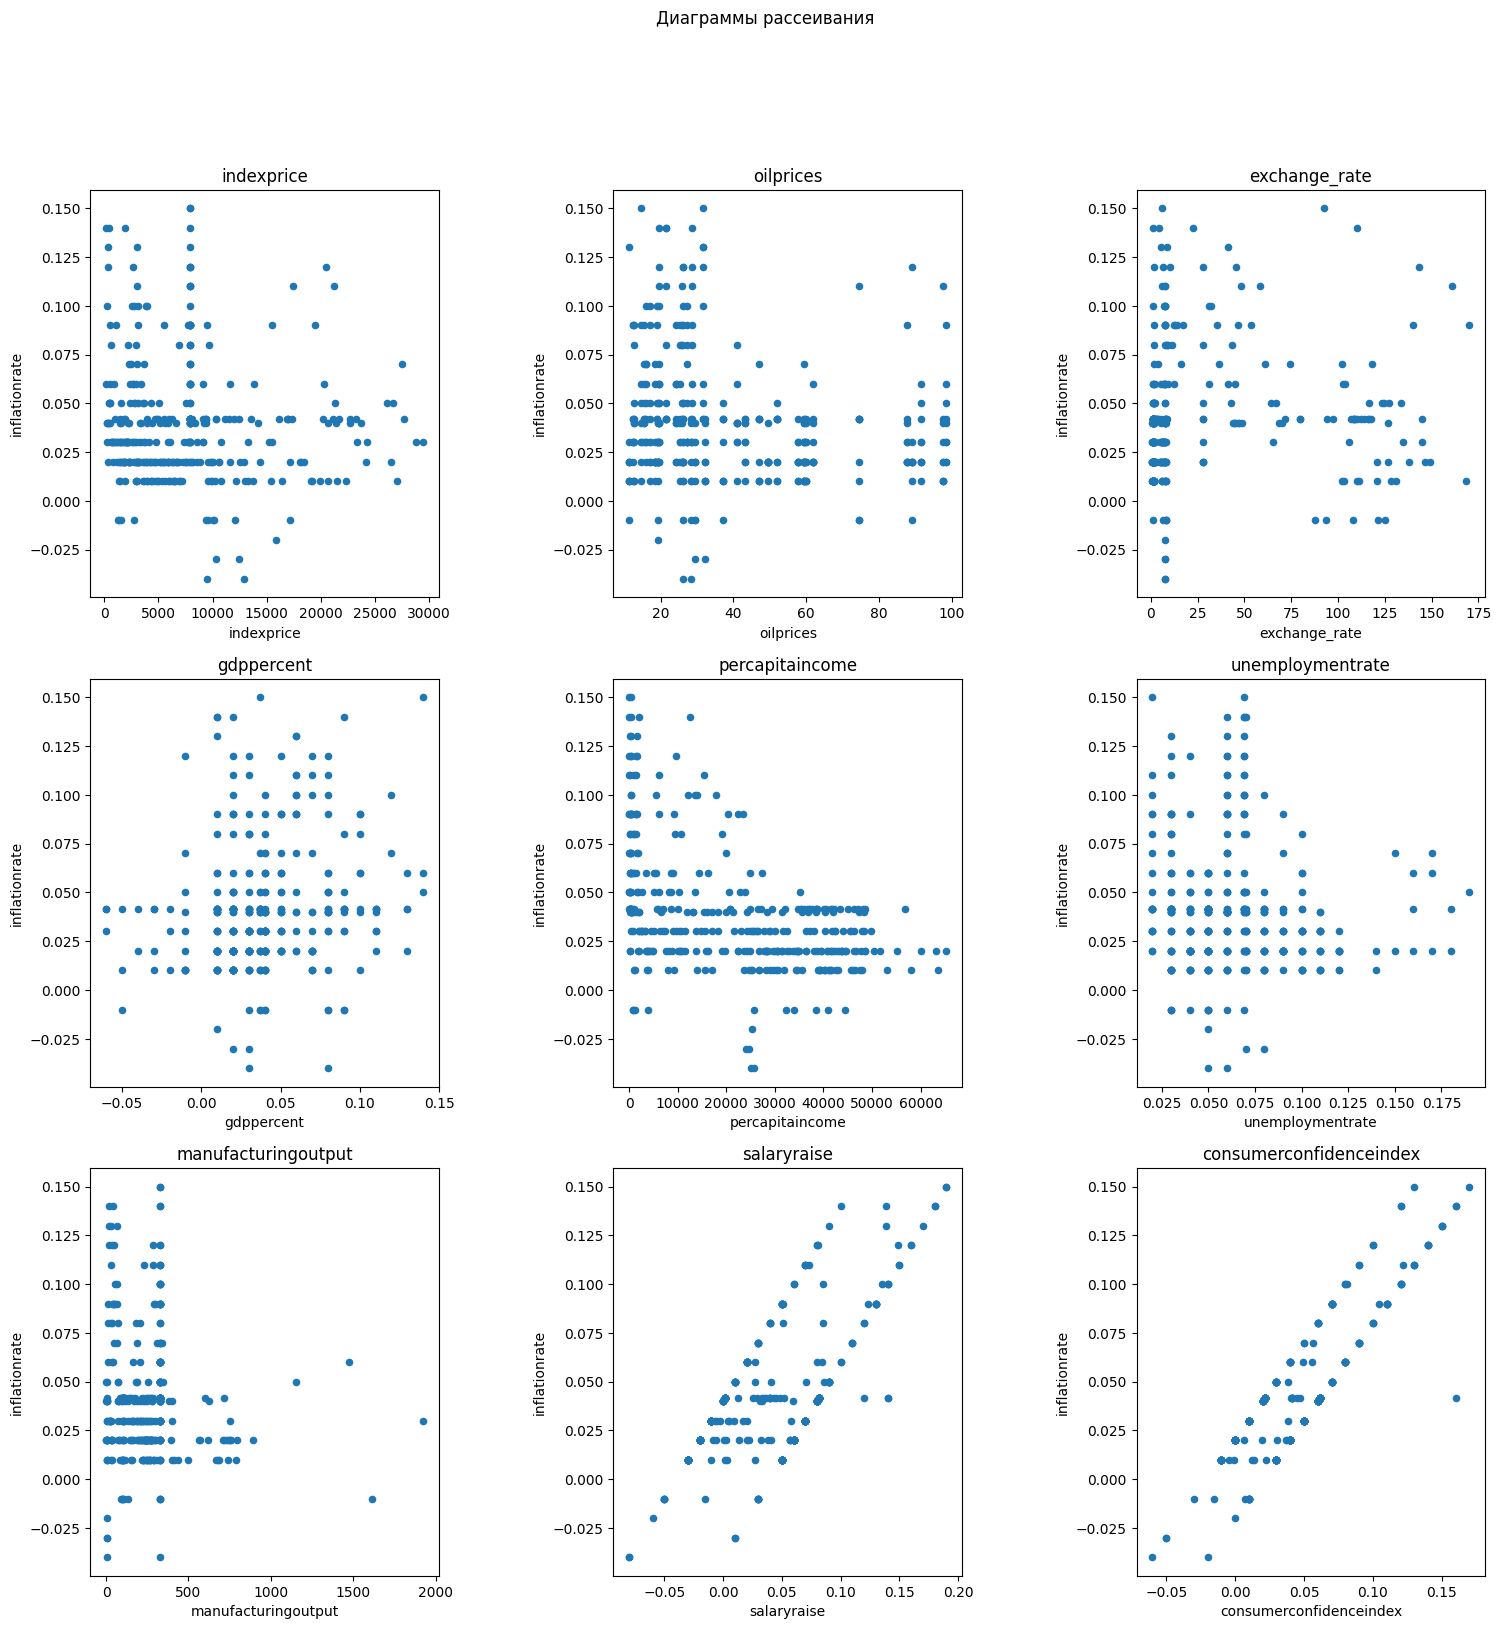

In [ ]:
columns_to_plot = df.columns.drop(['inflationrate', 'country', 'year', 'Continent_Asia', 'Continent_Europe', 'Continent_North America'])
num_cols = len(columns_to_plot)
num_rows = 3  # Ограничиваем количество рядов до 2

# Выстраиваем диаграммы рассеивания в ряд
fig, axes = plt.subplots(nrows=num_rows, ncols=(num_cols + 2) // 3, figsize=(18, 6 * num_rows))

# Построение диаграмм рассеивания для каждого столбца
for i, column in enumerate(columns_to_plot):
    row = i // ((num_cols + 2) // 3)
    col = i % ((num_cols + 2) // 3)

    # Проверяем, нужно ли отображать текущую ось
    if row * ((num_cols + 2) // 3) + col < num_cols:
        ax = axes[row, col]
        df.plot.scatter(x=column, y='inflationrate', ax=ax, s=20, marker='o')
        ax.set_title(column)
    else:
        # Если ось не нужна, скрываем ее
        axes[row, col].set_visible(False)

# Установка общего заголовка для ряда диаграмм рассеивания
fig.suptitle('Диаграммы рассеивания')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Отображение ряда диаграмм рассеивания
plt.show()

In [ ]:
# Определение модели регрессии
# Преобразование bool в float
df['Continent_Asia'] = df['Continent_Asia'].astype(float)
df['Continent_Europe'] = df['Continent_Europe'].astype(float)
df['Continent_North America'] = df['Continent_North America'].astype(float)
x = df[['indexprice', 'oilprices',	'exchange_rate', 'gdppercent', 'percapitaincome', 'unemploymentrate', 'manufacturingoutput', 'salaryraise', 'consumerconfidenceindex', 'Continent_Asia', 'Continent_Europe', 'Continent_North America']]
y = df['inflationrate']
x = sm.add_constant(x)
print(y.dtypes)
print(x.dtypes)
model = sm.OLS(y, x)
# Обучение модели
results = model.fit()
# Вывод результатов
print(results.summary())

float64
const                      float64
indexprice                 float64
oilprices                  float64
exchange_rate              float64
gdppercent                 float64
percapitaincome            float64
unemploymentrate           float64
manufacturingoutput        float64
salaryraise                float64
consumerconfidenceindex    float64
Continent_Asia             float64
Continent_Europe           float64
Continent_North America    float64
dtype: object
                            OLS Regression Results                            
Dep. Variable:          inflationrate   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.04e-113
Time:                        16:53:21   Log-Likelihood:                 1034.8
No. Observations:                 369   AIC:     

In [ ]:
# Определение модели регрессии
x = df[['percapitaincome', 'salaryraise', 'consumerconfidenceindex', 'unemploymentrate', 'Continent_Europe', 'Continent_North America']]
y = df['inflationrate']
x = sm.add_constant(x)
model = sm.OLS(y, x)
# Обучение модели
results = model.fit()
# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          inflationrate   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          5.21e-118
Time:                        16:53:21   Log-Likelihood:                 1031.6
No. Observations:                 369   AIC:                            -2049.
Df Residuals:                     362   BIC:                            -2022.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Определение модели регрессии
x = df[['percapitaincome', 'salaryraise', 'consumerconfidenceindex']]
y = df['inflationrate']
x = sm.add_constant(x)
model = sm.OLS(y, x)
# Обучение модели
results = model.fit()
# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          inflationrate   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     431.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.32e-119
Time:                        16:53:21   Log-Likelihood:                 1026.2
No. Observations:                 369   AIC:                            -2044.
Df Residuals:                     365   BIC:                            -2029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
df = df.sort_values(by = 'year', ascending = True)
df

,country,year,indexprice,inflationrate,oilprices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,salaryraise,consumerconfidenceindex,Continent_Asia,Continent_Europe,Continent_North America
0,United States of America,1980,168.610000,0.140000,21.59,1.000000,0.090000,12575.000000,0.070000,328.08482,0.100000,0.160000,0.0,0.0,1.0
82,India,1980,7898.648297,0.110000,21.59,7.890000,0.070000,267.000000,0.030000,31.21000,0.150000,0.090000,1.0,0.0,0.0
287,France,1980,394.440000,0.140000,21.59,4.230000,0.020000,1938.000000,0.068908,19.77000,0.180000,0.160000,0.0,1.0,0.0
246,Germany,1980,480.900000,0.050000,21.59,1.820000,0.010000,6206.000000,0.030000,328.08482,0.090000,0.070000,0.0,1.0,0.0
123,Japan,1980,6867.860000,0.080000,21.59,27.897548,0.030000,9463.000000,0.020000,71.01000,0.040000,0.100000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,United States of America,2020,10201.510000,0.010000,47.02,1.000000,-0.030000,63544.000000,0.080000,227.14000,-0.030000,-0.010000,0.0,0.0,1.0
204,Hong Kong,2020,27650.630000,0.041748,47.02,7.760000,-0.060000,46324.000000,0.060000,328.08482,0.044668,0.061748,1.0,0.0,0.0
163,Japan,2020,22705.020000,0.041748,47.02,106.760000,-0.050000,20719.964674,0.030000,90.94000,0.001748,0.021748,1.0,0.0,0.0
286,Germany,2020,13718.780000,0.010000,47.02,1.140000,-0.050000,45724.000000,0.060000,678.29000,-0.030000,-0.010000,0.0,1.0,0.0


In [ ]:
# Создание модели линейной регрессии
model = LinearRegression()
model.fit(df[['percapitaincome', 'salaryraise', 'consumerconfidenceindex']], df['inflationrate'])

# Получение прогнозных значений
y_pred = model.predict(df[['percapitaincome', 'salaryraise', 'consumerconfidenceindex']])

# Вычисление остатков
residuals = df['inflationrate'] - y_pred

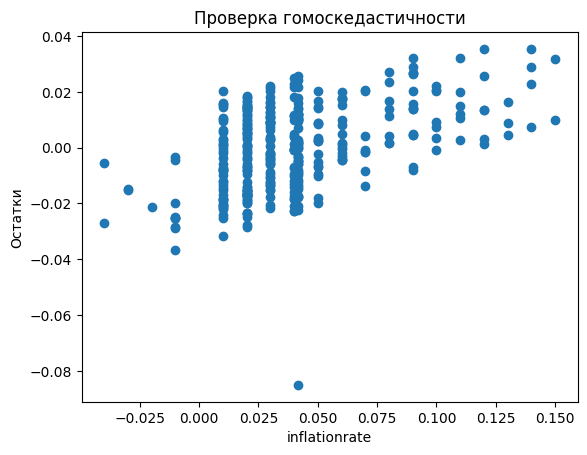

In [ ]:
# Визуальная проверка гомоскедастичности
plt.scatter(df['inflationrate'], residuals)
plt.xlabel('inflationrate')
plt.ylabel('Остатки')
plt.title('Проверка гомоскедастичности')
plt.show()

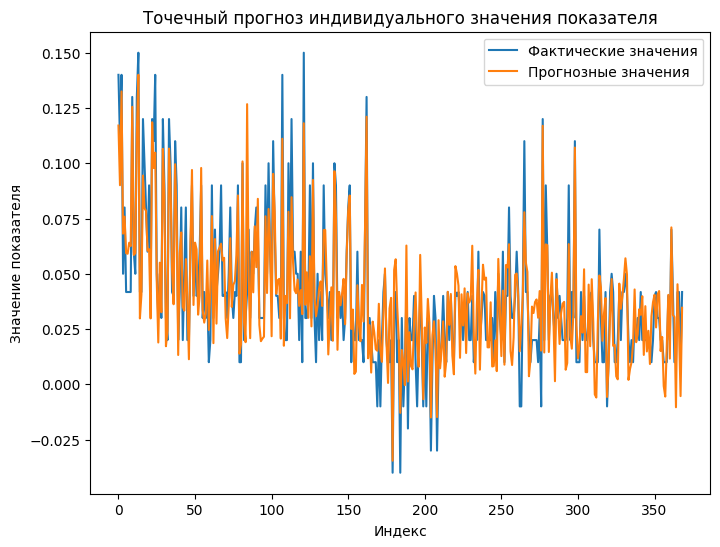

In [ ]:
# Создание figure и subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Построение точечного графика фактических и прогнозных значений
ax.plot(range(len(df['inflationrate'])), df['inflationrate'], label='Фактические значения')
ax.plot(range(len(y_pred)), y_pred, label='Прогнозные значения')

# Добавление меток и заголовка
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение показателя')
ax.set_title('Точечный прогноз индивидуального значения показателя')
ax.legend()

# Отображение графика
plt.show()

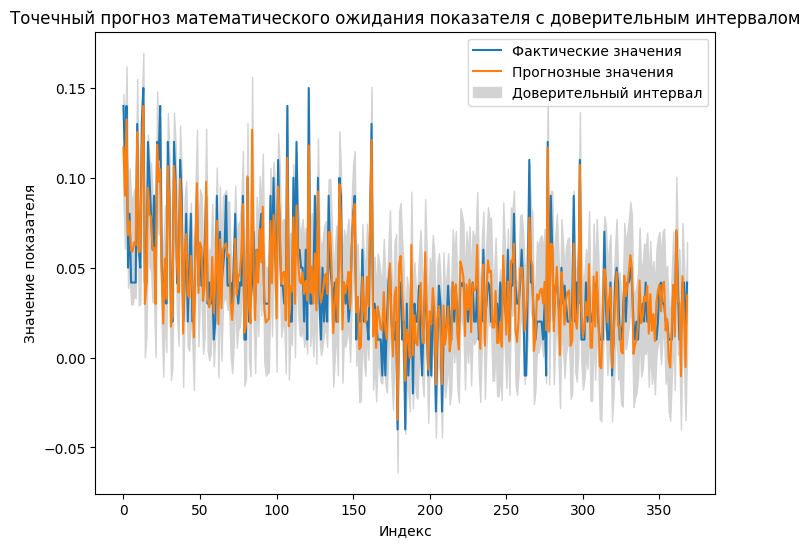

In [ ]:
# Создание figure и subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Построение точечного графика фактических и прогнозных значений
ax.plot(range(len(df['inflationrate'])), df['inflationrate'], label='Фактические значения')
ax.plot(range(len(y_pred)), y_pred, label='Прогнозные значения')

# Вычисление доверительного интервала для прогноза математического ожидания
mse = np.mean((df['inflationrate'] - y_pred)**2)  # среднеквадратическая ошибка регрессии
n = len(df)  # число наблюдений
k = 1  # число независимых переменных
x0 = np.mean(df.index)  # среднее значение индекса
x_var = np.sum((df.index - x0)**2)  # сумма квадратов отклонений индекса от среднего

se_y_pred = np.sqrt(mse * (1 + 1/n + (df.index - x0)**2 / x_var))  # стандартная ошибка прогноза
alpha = 0.05  # уровень значимости
t_crit = np.abs(stats.t.ppf(alpha/2, n-k-1))  # критическое значение t-распределения
# Вычисление доверительного интервала
conf_int_lower = y_pred - t_crit * se_y_pred
conf_int_upper = y_pred + t_crit * se_y_pred

# Построение доверительного интервала
ax.fill_between(range(len(y_pred)), conf_int_lower, conf_int_upper, color='lightgray', label='Доверительный интервал')

# Добавление меток и заголовка
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение показателя')
ax.set_title('Точечный прогноз математического ожидания показателя с доверительным интервалом')
ax.legend()

# Отображение графика
plt.show()

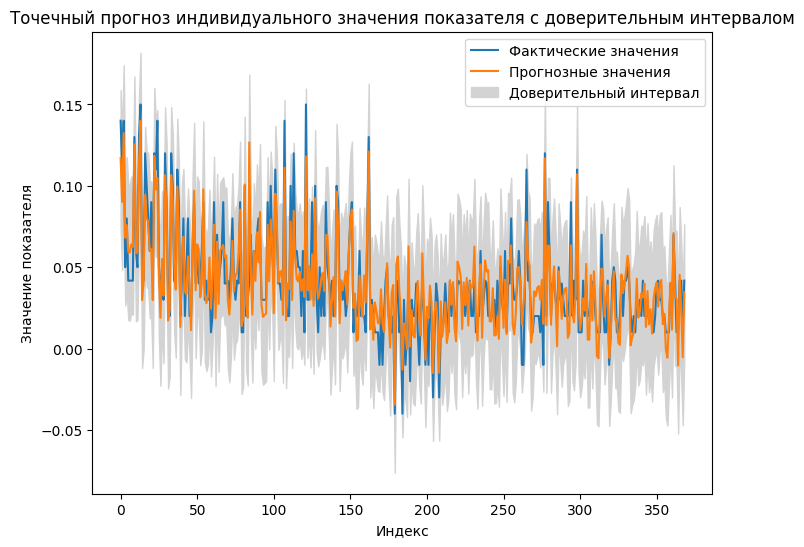

In [ ]:
# Создание figure и subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Построение точечного графика фактических и прогнозных значений
ax.plot(range(len(df['inflationrate'])), df['inflationrate'], label='Фактические значения')
ax.plot(range(len(y_pred)), y_pred, label='Прогнозные значения')

# Вычисление доверительного интервала для прогноза индивидуального значения
mse = np.mean((df['inflationrate'] - y_pred)**2)  # среднеквадратическая ошибка регрессии
n = len(df)  # число наблюдений
k = 1  # число независимых переменных
x0 = np.mean(df.index)  # среднее значение индекса
x_var = np.sum((df.index - x0)**2)  # сумма квадратов отклонений индекса от среднего

se_y_pred_ind = np.sqrt(mse * (1 + 1 + (df.index - x0)**2 / x_var))  # стандартная ошибка прогноза индивидуального значения
alpha = 0.05  # уровень значимости
t_crit = np.abs(stats.t.ppf(alpha/2, n-k-1))  # критическое значение t-распределения
conf_int_lower = y_pred - t_crit * se_y_pred_ind
conf_int_upper = y_pred + t_crit * se_y_pred_ind

# Построение доверительного интервала
ax.fill_between(range(len(y_pred)), conf_int_lower, conf_int_upper, color='lightgray', label='Доверительный интервал')

# Добавление меток и заголовка
ax.set_xlabel('Индекс')
ax.set_ylabel('Значение показателя')
ax.set_title('Точечный прогноз индивидуального значения показателя с доверительным интервалом')
ax.legend()

# Отображение графика
plt.show()

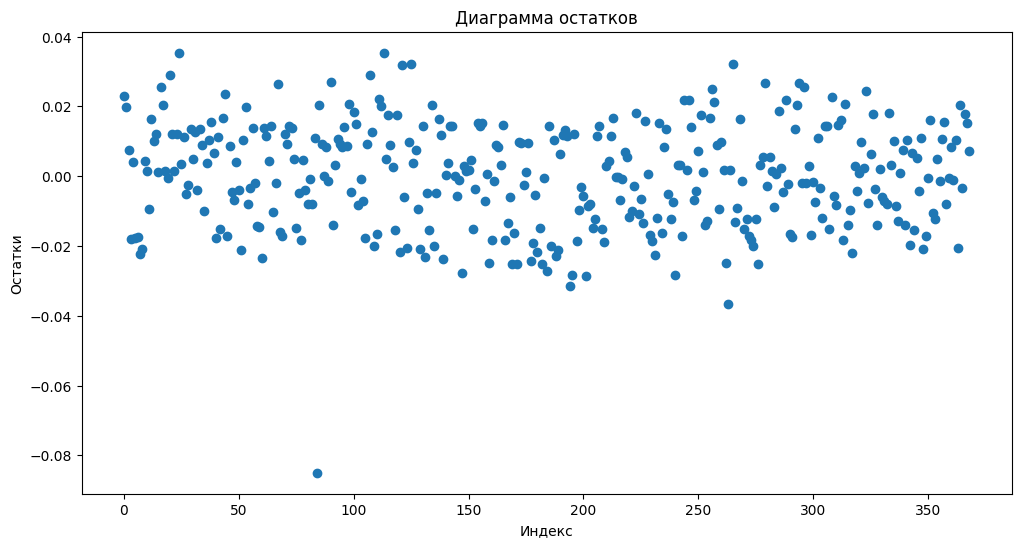

In [ ]:
# Построение диаграммы остатков
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(range(len(residuals)), residuals)
ax.set_xlabel('Индекс')
ax.set_ylabel('Остатки')
ax.set_title('Диаграмма остатков')
plt.show()

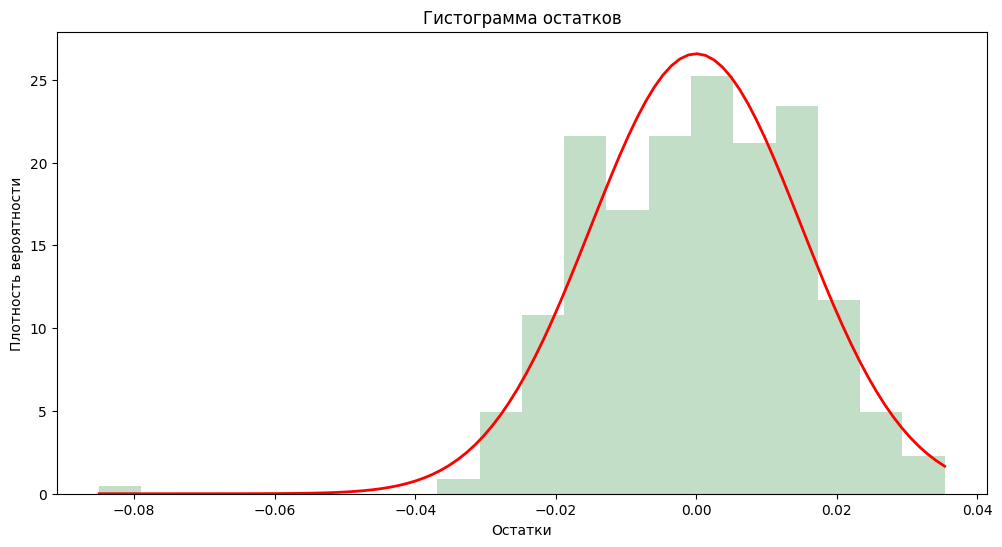

In [ ]:
# Построение гистограммы остатков
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(residuals, bins=20, density=True, alpha=0.5, color='#86bf91')

# Наложение кривой нормального распределения
mean = residuals.mean()
std = residuals.std()
x = np.linspace(min(residuals), max(residuals), 100)
ax.plot(x, stats.norm.pdf(x, mean, std), 'r-', lw=2)

ax.set_xlabel('Остатки')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Гистограмма остатков')
plt.show()

In [ ]:
# Вычисление статистики теста Дарбина-Уотсона
dw_stat = durbin_watson(residuals)

print(f"Статистика теста Дарбина-Уотсона: {dw_stat:.2f}")

Статистика теста Дарбина-Уотсона: 1.86


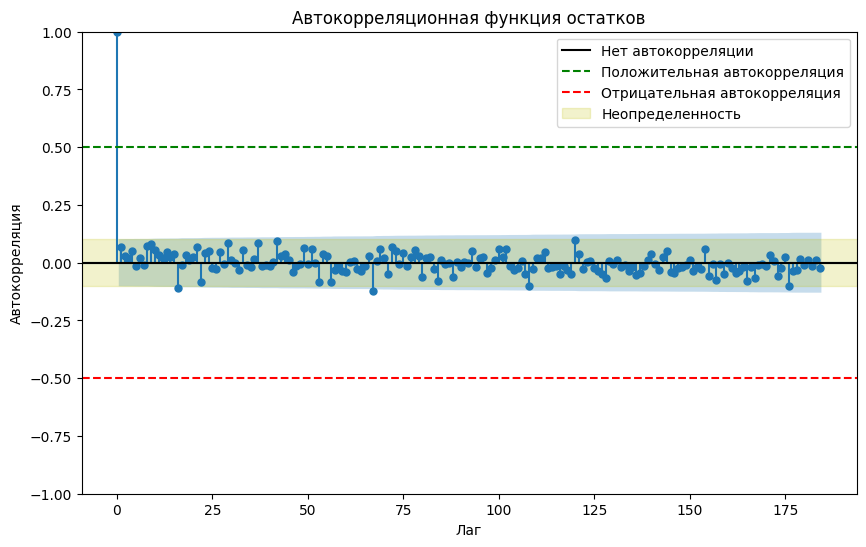

In [ ]:
# Построение графика автокорреляционной функции остатков
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(residuals, alpha=0.05, lags=len(residuals)//2, ax=ax)

# Обозначение различных состояний автокорреляции
ax.axhline(y=0, color='k', linestyle='-', label='Нет автокорреляции')
ax.axhline(y=0.5, color='g', linestyle='--', label='Положительная автокорреляция')
ax.axhline(y=-0.5, color='r', linestyle='--', label='Отрицательная автокорреляция')
ax.axhspan(-1.96/np.sqrt(len(residuals)), 1.96/np.sqrt(len(residuals)), alpha=0.2, color='y', label='Неопределенность')

plt.title("Автокорреляционная функция остатков")
plt.xlabel("Лаг")
plt.ylabel("Автокорреляция")
plt.legend()
plt.show()

In [ ]:
x = df[['percapitaincome', 'salaryraise', 'consumerconfidenceindex']]
x = sm.add_constant(x)

# Проведение теста Уайта
lm_stat, lm_pval, f_stat, f_pval = het_white(residuals, x)

print(f"Статистика теста Уайта: {lm_stat:.4f}")
print(f"P-значение теста Уайта: {lm_pval:.4f}")
print(f"F-статистика теста Уайта: {f_stat:.4f}")
print(f"P-значение F-теста: {f_pval:.4f}")

Статистика теста Уайта: 47.5829
P-значение теста Уайта: 0.0000
F-статистика теста Уайта: 5.9052
P-значение F-теста: 0.0000
